In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer



In [4]:
file_path = "/content/Walmart DataSet.csv"  # Replace with the correct path to your dataset
data = pd.read_csv(file_path)

In [5]:
# Display the first few rows to understand the structure of the data
print(data.head())


   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [6]:
# Display summary information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [8]:
print(data.describe())

             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000  


In [9]:
print(data.dtypes)

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


In [12]:
data['Store'].nunique()

45

In [14]:
data['Weekly_Sales'].fillna(data['Weekly_Sales'].mean(), inplace=True)
data['Temperature'].fillna(data['Temperature'].median(), inplace=True)
data['Fuel_Price'].fillna(data['Fuel_Price'].mean(), inplace=True)
data['CPI'].fillna(data['CPI'].mean(), inplace=True)
data['Unemployment'].fillna(data['Unemployment'].median(), inplace=True)


<ipython-input-14-191516a102f4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Weekly_Sales'].fillna(data['Weekly_Sales'].mean(), inplace=True)
<ipython-input-14-191516a102f4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [16]:
print(data.isnull().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [17]:
def handle_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    col = np.where(col < lower_bound, lower_bound, col)
    col = np.where(col > upper_bound, upper_bound, col)
    return col

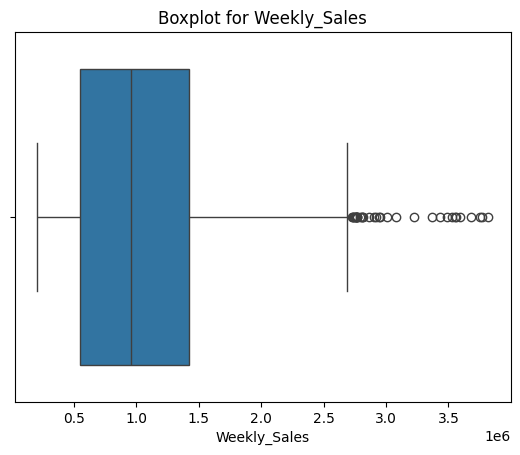

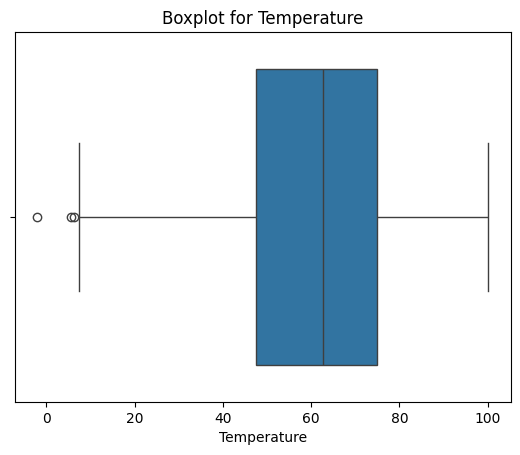

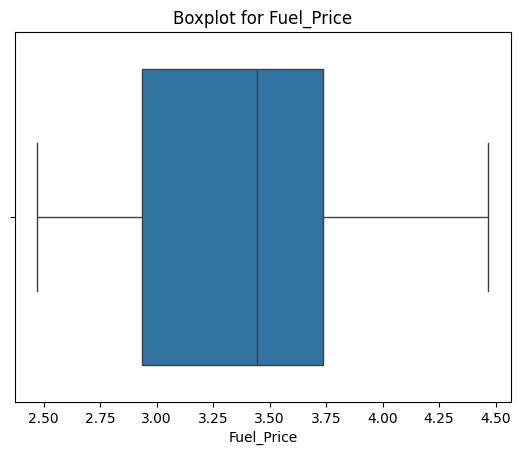

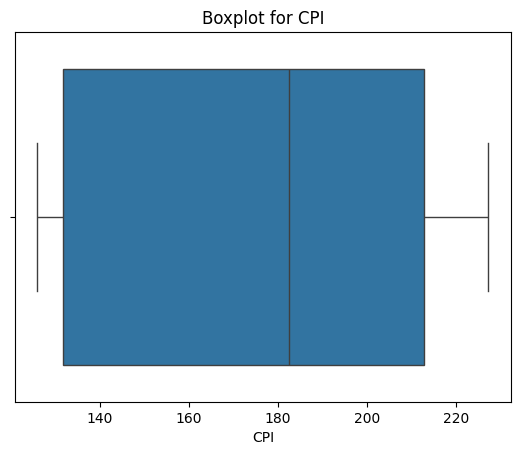

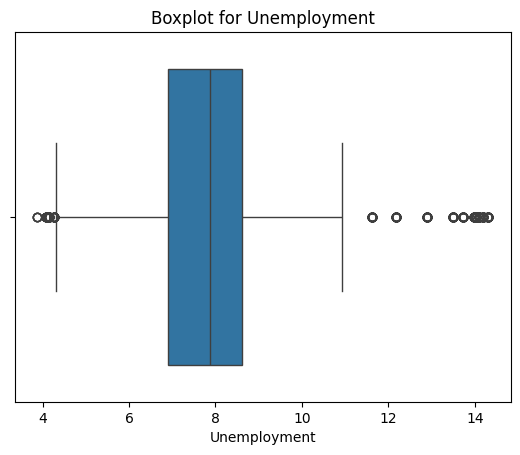

In [19]:
features = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
for feature in features:
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot for {feature}')
    plt.show()

In [20]:
for feature in features:
    data[feature] = handle_outliers(data[feature])

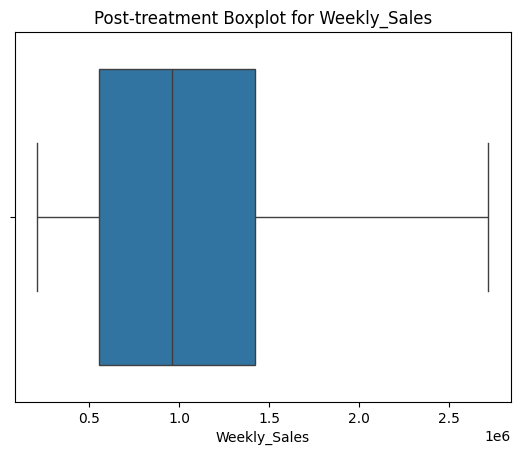

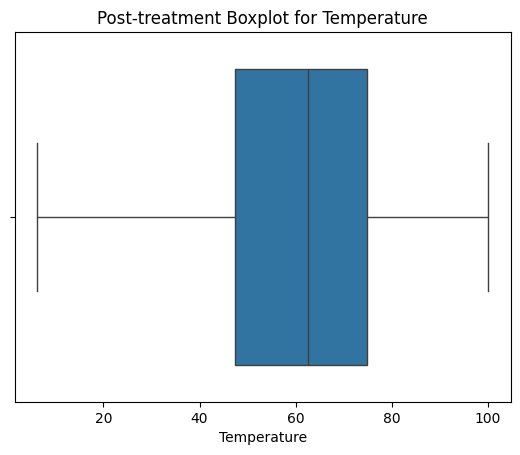

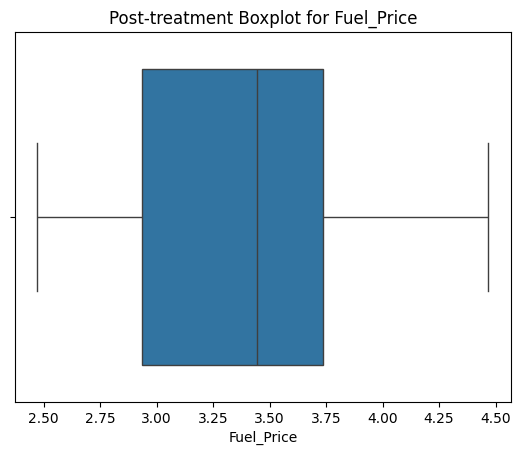

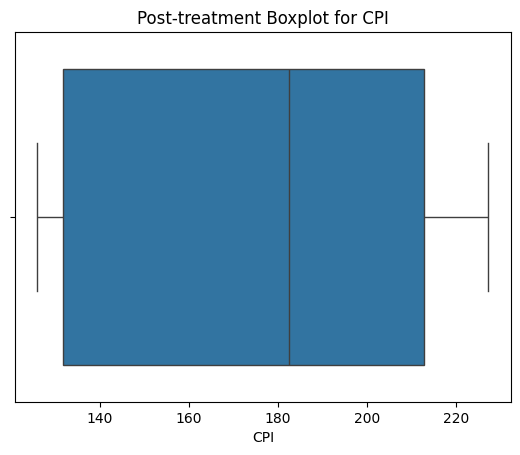

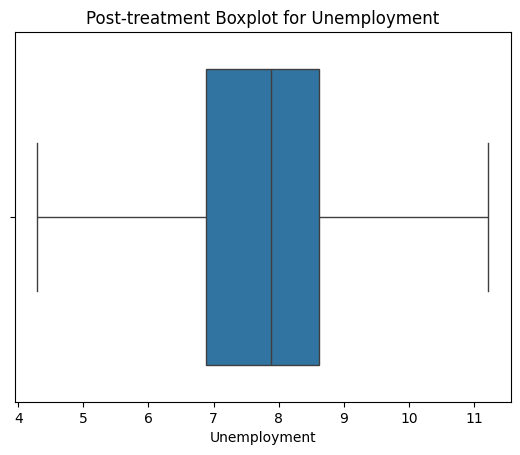

In [21]:
for feature in features:
    sns.boxplot(x=data[feature])
    plt.title(f'Post-treatment Boxplot for {feature}')
    plt.show()

In [24]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

In [25]:
store_sales = data.groupby(['Date', 'Store'])['Weekly_Sales'].sum().reset_index()

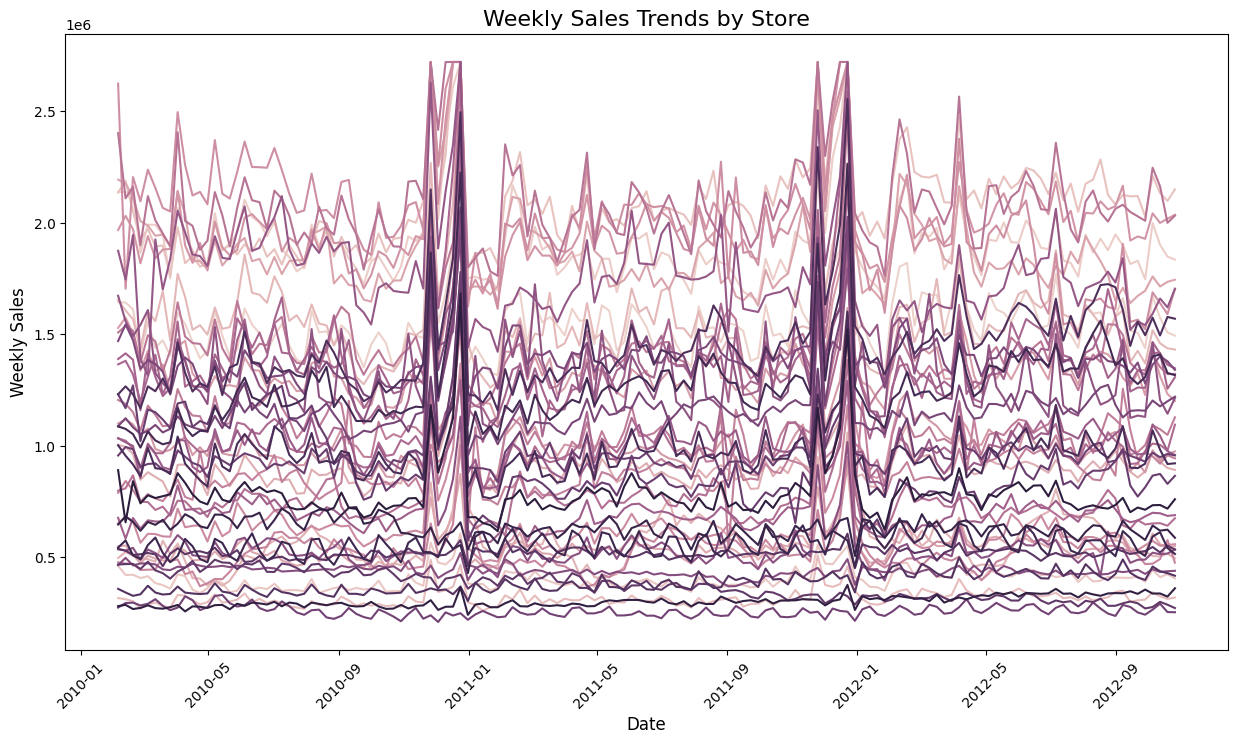

In [26]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=store_sales, x='Date', y='Weekly_Sales', hue='Store', legend=False)
plt.title('Weekly Sales Trends by Store', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)
plt.xticks(rotation=45)
plt.show()

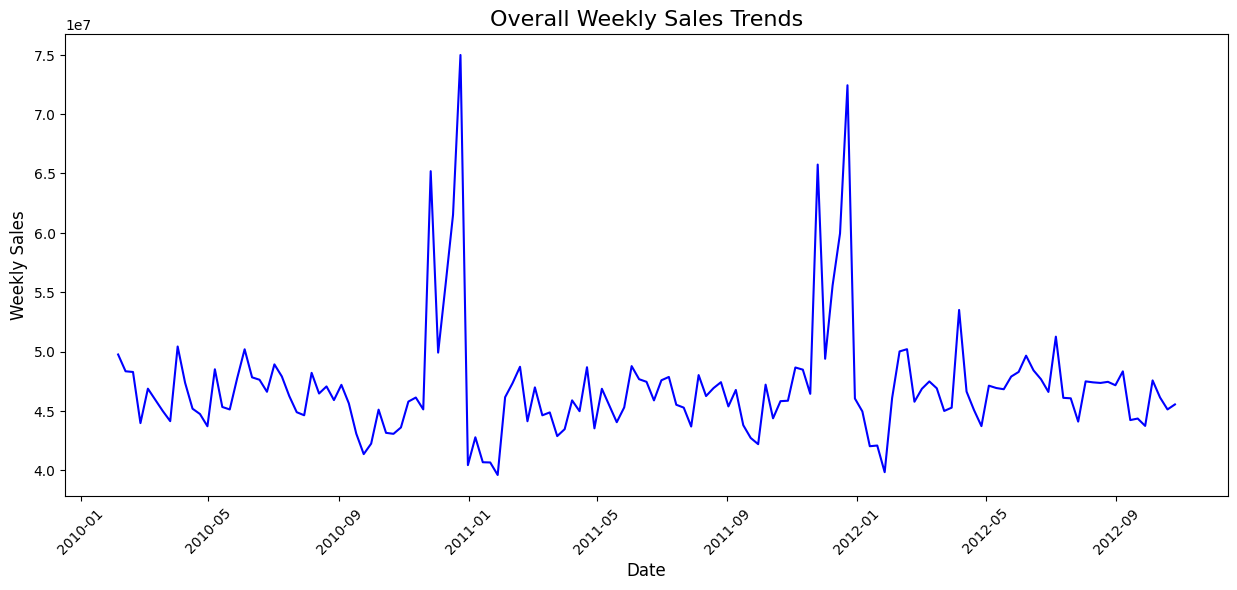

In [27]:
overall_sales = data.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Plot overall sales trends
plt.figure(figsize=(15, 6))
sns.lineplot(data=overall_sales, x='Date', y='Weekly_Sales', color='blue')
plt.title('Overall Weekly Sales Trends', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Correlation between Unemployment and Weekly Sales:
              Unemployment  Weekly_Sales
Unemployment      1.000000     -0.108662
Weekly_Sales     -0.108662      1.000000


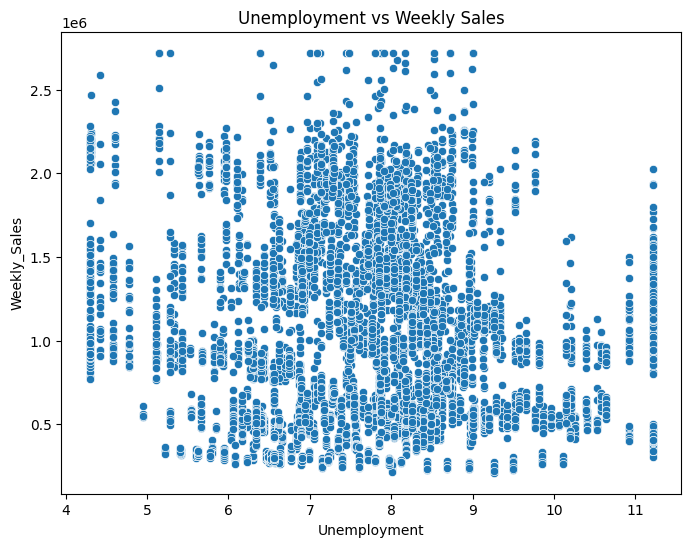


Correlation between Unemployment and Weekly Sales for each store:
Store              
1      Unemployment   -0.097955
2      Unemployment    0.064159
3      Unemployment   -0.230413
4      Unemployment   -0.455947
5      Unemployment   -0.207043
6      Unemployment    0.044128
7      Unemployment   -0.165382
8      Unemployment   -0.052580
9      Unemployment   -0.191534
10     Unemployment    0.161782
11     Unemployment   -0.020339
12     Unemployment    0.098471
13     Unemployment   -0.234810
14     Unemployment    0.250873
15     Unemployment    0.078905
16     Unemployment   -0.070864
17     Unemployment   -0.263600
18     Unemployment    0.139179
19     Unemployment    0.101464
20     Unemployment   -0.108839
21     Unemployment    0.218367
22     Unemployment    0.039043
23     Unemployment   -0.078912
24     Unemployment   -0.012261
25     Unemployment   -0.004958
26     Unemployment   -0.066899
27     Unemployment   -0.016031
28     Unemployment    0.126468
29     Unemployme

In [29]:
correlation_unemployment = data[['Unemployment', 'Weekly_Sales']].corr()
print("Correlation between Unemployment and Weekly Sales:")
print(correlation_unemployment)

# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=data)
plt.title('Unemployment vs Weekly Sales')
plt.show()

# Group by 'Store' and calculate correlation for each store
store_unemployment_corr = data.groupby('Store')[['Unemployment', 'Weekly_Sales']].corr().iloc[0::2, -1]
print("\nCorrelation between Unemployment and Weekly Sales for each store:")
print(store_unemployment_corr)

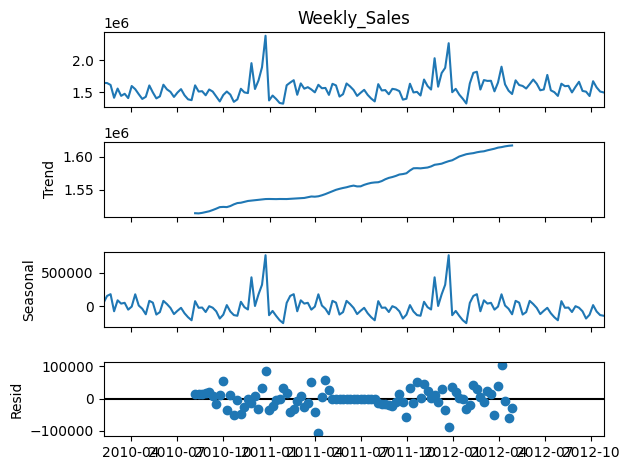

Seasonal component for Store 1:
Date
2010-02-05     52357.762287
2010-02-12    156391.364691
2010-02-19    182889.268105
2010-02-26    -72996.946799
2010-03-05     90833.297960
                  ...      
2012-09-28   -124349.358963
2012-10-05     19354.076134
2012-10-12    -76241.578530
2012-10-19   -130072.314924
2012-10-26   -140188.806703
Name: seasonal, Length: 143, dtype: float64


In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set Date as index for time series analysis
data.set_index('Date', inplace=True)

# Decompose time series for a particular store, e.g., Store 1
store_1_sales = data[data['Store'] == 1]['Weekly_Sales']

# Decompose the sales time series
decomposition = seasonal_decompose(store_1_sales, model='additive', period=52)  # 52 weeks for yearly seasonality
decomposition.plot()
plt.show()

# Analyze peak sales during holidays or seasonal periods by checking seasonal component
seasonal_component = decomposition.seasonal
print("Seasonal component for Store 1:")
print(seasonal_component)


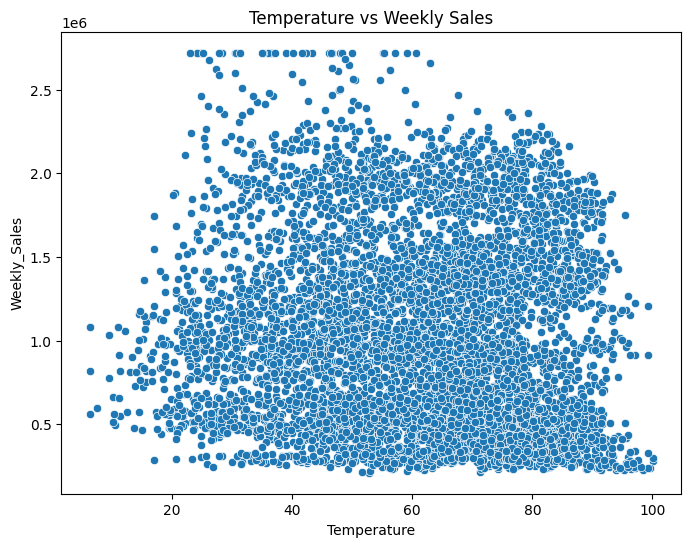


Correlation between Temperature and Weekly Sales:
              Temperature  Weekly_Sales
Temperature      1.000000     -0.060808
Weekly_Sales    -0.060808      1.000000


In [32]:
# Scatter plot to visualize the relationship between Temperature and Weekly_Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data)
plt.title('Temperature vs Weekly Sales')
plt.show()

# Calculate correlation between Temperature and Weekly_Sales
correlation_temperature = data[['Temperature', 'Weekly_Sales']].corr()
print("\nCorrelation between Temperature and Weekly Sales:")
print(correlation_temperature)



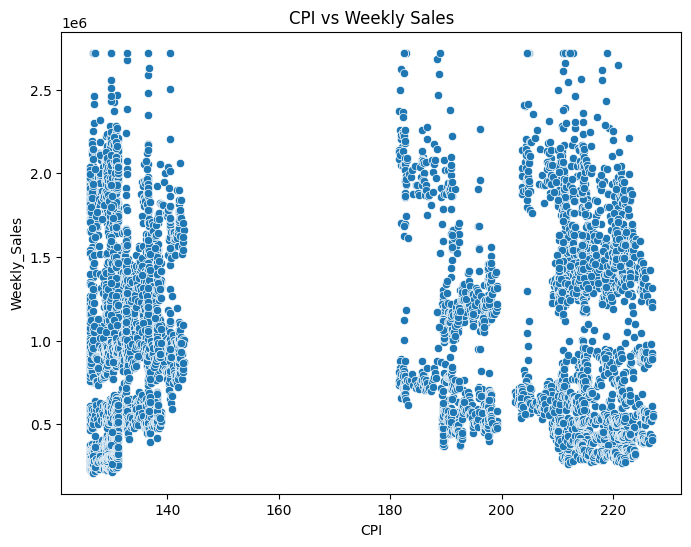


Correlation between CPI and Weekly Sales:
                   CPI  Weekly_Sales
CPI           1.000000     -0.072627
Weekly_Sales -0.072627      1.000000

Correlation between CPI and Weekly Sales for each store:
Store     
1      CPI    0.225408
2      CPI   -0.063428
3      CPI    0.317250
4      CPI    0.467196
5      CPI    0.308261
6      CPI   -0.011120
7      CPI    0.289044
8      CPI    0.120255
9      CPI    0.294805
10     CPI   -0.135322
11     CPI    0.069781
12     CPI    0.084087
13     CPI    0.225519
14     CPI   -0.482162
15     CPI   -0.174467
16     CPI    0.124285
17     CPI    0.348571
18     CPI   -0.193541
19     CPI   -0.155341
20     CPI    0.097201
21     CPI   -0.163649
22     CPI   -0.038602
23     CPI    0.084813
24     CPI   -0.013684
25     CPI   -0.010914
26     CPI    0.131980
27     CPI   -0.214354
28     CPI   -0.095908
29     CPI   -0.072530
30     CPI   -0.298188
31     CPI    0.132887
32     CPI    0.196782
33     CPI   -0.052271
34     CPI    0.11

In [33]:
# Scatter plot to visualize the relationship between CPI and Weekly_Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=data)
plt.title('CPI vs Weekly Sales')
plt.show()

# Calculate correlation between CPI and Weekly_Sales
correlation_CPI = data[['CPI', 'Weekly_Sales']].corr()
print("\nCorrelation between CPI and Weekly Sales:")
print(correlation_CPI)

# Group by 'Store' and calculate CPI correlation for each store
store_CPI_corr = data.groupby('Store')[['CPI', 'Weekly_Sales']].corr().iloc[0::2, -1]
print("\nCorrelation between CPI and Weekly Sales for each store:")
print(store_CPI_corr)


<ipython-input-34-6d3e480eb7df>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weekly_Sales', y='Store', data=top_stores, palette='Blues_d')
<ipython-input-34-6d3e480eb7df>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weekly_Sales', y='Store', data=worst_stores, palette='Reds_d')


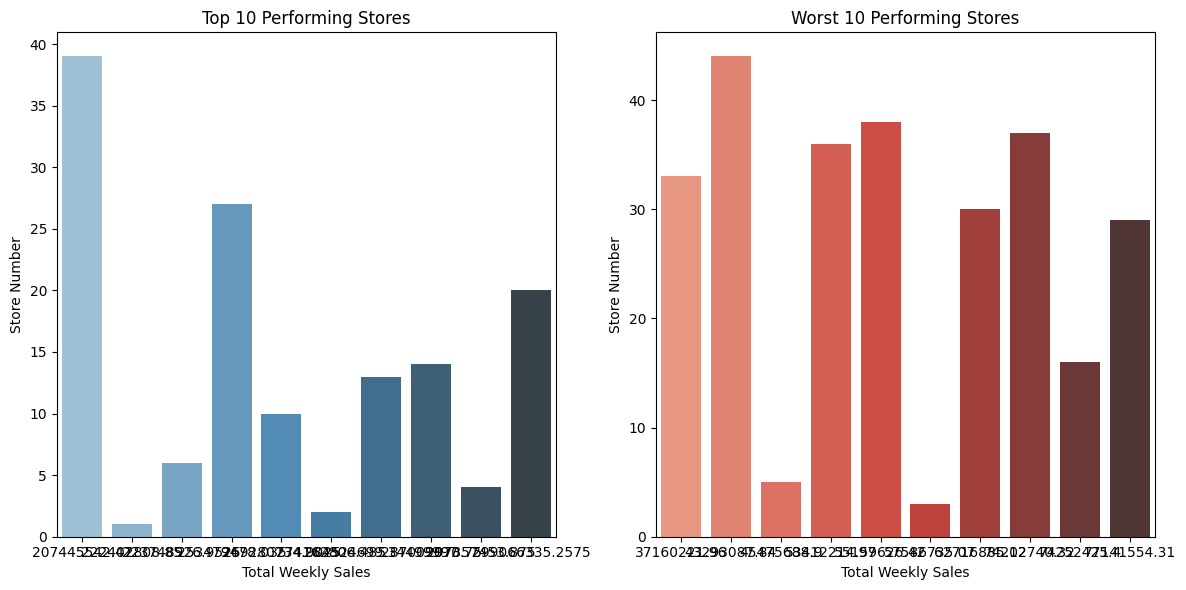

In [34]:



total_sales_per_store = data.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Step 2: Rank stores by total sales and visualize the top and worst-performing stores
# Get top 10 stores with the highest total sales
top_stores = total_sales_per_store.nlargest(10, 'Weekly_Sales')

# Get top 10 stores with the lowest total sales
worst_stores = total_sales_per_store.nsmallest(10, 'Weekly_Sales')

# Step 3: Visualize the results using seaborn barplot
plt.figure(figsize=(12, 6))

# Plot for top performing stores
plt.subplot(1, 2, 1)
sns.barplot(x='Weekly_Sales', y='Store', data=top_stores, palette='Blues_d')
plt.title('Top 10 Performing Stores')
plt.xlabel('Total Weekly Sales')
plt.ylabel('Store Number')

# Plot for worst performing stores
plt.subplot(1, 2, 2)
sns.barplot(x='Weekly_Sales', y='Store', data=worst_stores, palette='Reds_d')
plt.title('Worst 10 Performing Stores')
plt.xlabel('Total Weekly Sales')
plt.ylabel('Store Number')

# Show the plots
plt.tight_layout()
plt.show()


In [36]:
data_weekly_sales = data.groupby(['Store', 'Date']).agg({'Weekly_Sales': 'sum'}).reset_index()
print(data_weekly_sales.head())

   Store       Date  Weekly_Sales
0      1 2010-02-05    1643690.90
1      1 2010-02-12    1641957.44
2      1 2010-02-19    1611968.17
3      1 2010-02-26    1409727.59
4      1 2010-03-05    1554806.68


In [37]:
# Sorting by Store and Date to ensure proper time series order
data_weekly_sales.sort_values(by=['Store', 'Date'], inplace=True)

# Splitting the data into train and test (using the last 12 weeks for test)
train_size = len(data_weekly_sales) - 12
train_data = data_weekly_sales.iloc[:train_size]
test_data = data_weekly_sales.iloc[train_size:]

# Display train and test shapes
print(train_data.shape, test_data.shape)


(6423, 3) (12, 3)


In [39]:
from statsmodels.tsa.stattools import adfuller

# Function for ADF test
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

# Check for stationarity (e.g., for Store 1)
adf_test(data_weekly_sales[data_weekly_sales['Store'] == 1]['Weekly_Sales'])


ADF Statistic: -5.102186145192288
p-value: 1.3877788330759434e-05


<Figure size 1200x600 with 0 Axes>

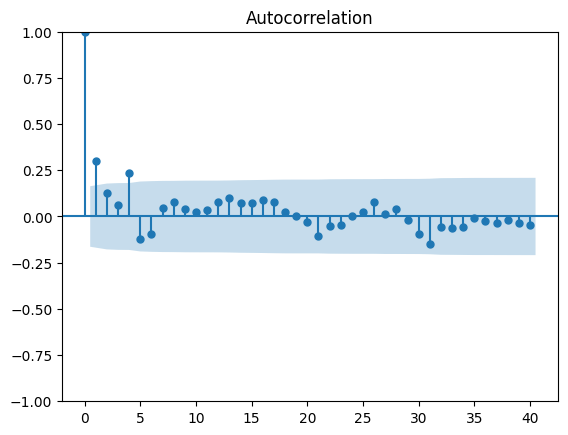

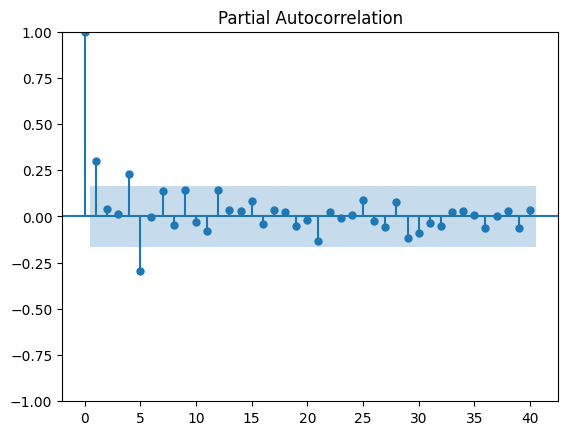

In [40]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Store 1 time series data
store_1_sales = data_weekly_sales[data_weekly_sales['Store'] == 1]['Weekly_Sales']

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plot_acf(store_1_sales, lags=40)
plot_pacf(store_1_sales, lags=40)
plt.show()


In [41]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model for Store 1 (e.g., p=1, d=1, q=1 as an example)
model = ARIMA(store_1_sales, order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1905.518
Date:                Sun, 22 Dec 2024   AIC                           3817.037
Time:                        12:09:42   BIC                           3825.904
Sample:                             0   HQIC                          3820.640
                                - 143                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3937      0.057      6.865      0.000       0.281       0.506
ma.L1         -0.9367      0.032    -29.470      0.000      -0.999      -0.874
sigma2      2.445e+10   3.44e-14    7.1e+23      0.0

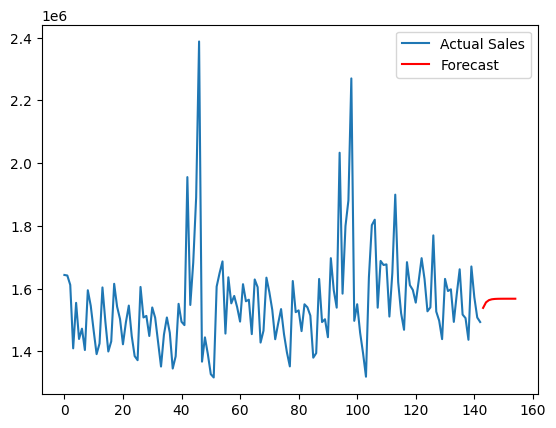

RMSE: 834222.1230763762


In [42]:
# Forecast the next 12 weeks
forecast = model_fit.forecast(steps=12)

# Visualize the forecast
plt.plot(store_1_sales, label='Actual Sales')
plt.plot(range(len(store_1_sales), len(store_1_sales) + 12), forecast, label='Forecast', color='red')
plt.legend()
plt.show()

# Calculate RMSE
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming 'test_data' contains the actual sales for the forecast period
rmse = np.sqrt(mean_squared_error(test_data['Weekly_Sales'], forecast))
print(f'RMSE: {rmse}')


In [46]:
import numpy as np

# Function to create lag features
def create_lag_features(data, lags=12):
    for lag in range(1, lags + 1):
        data[f'Weekly_Sales_lag{lag}'] = data['Weekly_Sales'].shift(lag)
    return data

# Create lag features
data_lagged = create_lag_features(data_weekly_sales)

# Drop rows with missing values (after creating lag features)
data_lagged.dropna(inplace=True)

# Features and target variable
X = data_lagged.drop(columns=['Weekly_Sales', 'Date'])
y = data_lagged['Weekly_Sales']

# Train-test split for Random Forest/XGBoost
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)



In [47]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test)

# RMSE for Random Forest
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
print(f'Random Forest RMSE: {rf_rmse}')


Random Forest RMSE: 105755.32198337493


In [48]:
import xgboost as xgb

# Train XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_model.fit(X_train, y_train)

# Predictions
xgb_predictions = xgb_model.predict(X_test)

# RMSE for XGBoost
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
print(f'XGBoost RMSE: {xgb_rmse}')


XGBoost RMSE: 203428.62568696457


In [49]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

mae_rf = mean_absolute_error(y_test, rf_predictions)
mape_rf = mean_absolute_percentage_error(y_test, rf_predictions)

mae_xgb = mean_absolute_error(y_test, xgb_predictions)
mape_xgb = mean_absolute_percentage_error(y_test, xgb_predictions)

print(f'Random Forest MAE: {mae_rf}, MAPE: {mape_rf}')
print(f'XGBoost MAE: {mae_xgb}, MAPE: {mape_xgb}')


Random Forest MAE: 68524.69233287935, MAPE: 0.1125292298709807
XGBoost MAE: 156814.82519357977, MAPE: 0.22344127506492004


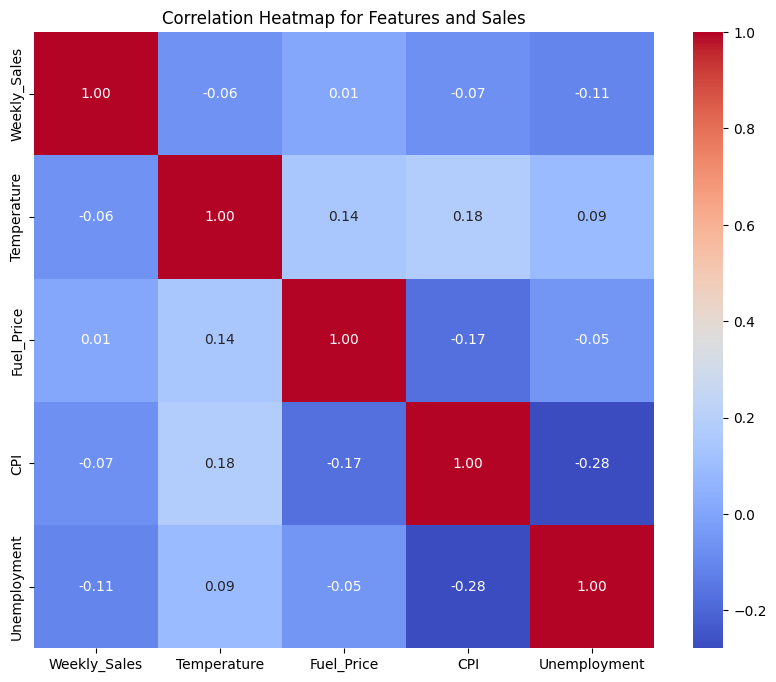

In [51]:
# Calculate correlations
correlation_matrix = data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap for Features and Sales')
plt.show()

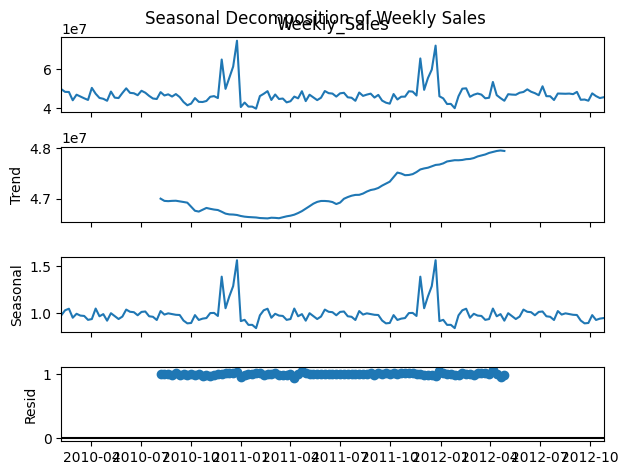

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Reset index if 'Date' is currently the index
if 'Date' in data.index.names:
    data.reset_index(inplace=True)

# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Group by date to get weekly sales per week
weekly_sales = data.groupby('Date')['Weekly_Sales'].sum()

# Decompose the time series to see seasonal components
result = seasonal_decompose(weekly_sales, model='multiplicative', period=52)  # Assuming weekly sales have annual seasonality

# Plot the decomposition
result.plot()
plt.suptitle('Seasonal Decomposition of Weekly Sales')
plt.show()


In [55]:
# Correlation between Unemployment and Weekly Sales
unemployment_sales_corr = data.groupby('Store')[['Weekly_Sales', 'Unemployment']].corr().iloc[0::2, -1]

# Identify stores with high negative correlation
stores_suffering_most = unemployment_sales_corr[unemployment_sales_corr < -0.5]
print("Stores suffering the most due to unemployment:")
print(stores_suffering_most)


Stores suffering the most due to unemployment:
Store              
44     Weekly_Sales   -0.780076
Name: Unemployment, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


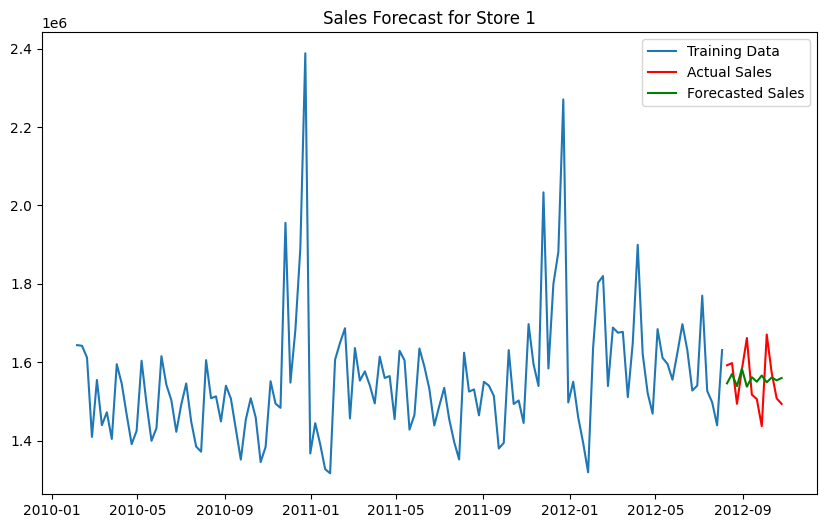

RMSE for Store 1 Forecast: 72125.11


In [56]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare time series for a single store (Store 1 as an example)
store_data = data[data['Store'] == 1].groupby('Date')['Weekly_Sales'].sum()

# Split into training and test set (last 12 weeks for test)
train = store_data[:-12]
test = store_data[-12:]

# Fit ARIMA model (order: p=5, d=1, q=0)
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Forecast for the next 12 weeks
forecast = model_fit.forecast(steps=12)

# Evaluate the model
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

# Plot the forecast vs actual
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Sales', color='red')
plt.plot(test.index, forecast, label='Forecasted Sales', color='green')
plt.title('Sales Forecast for Store 1')
plt.legend()
plt.show()

print(f"RMSE for Store 1 Forecast: {rmse:.2f}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


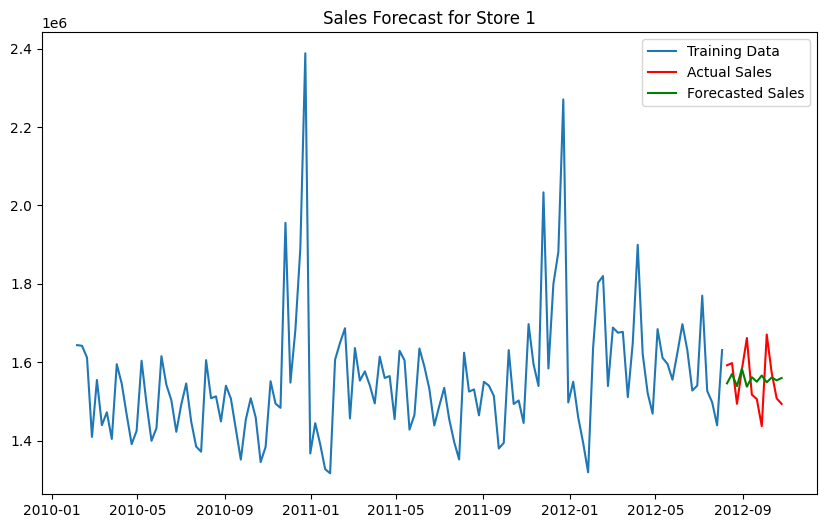

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


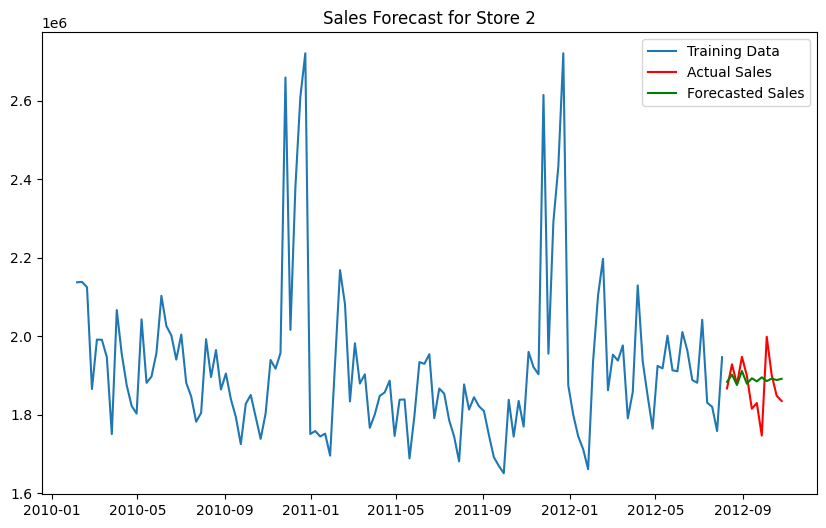

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


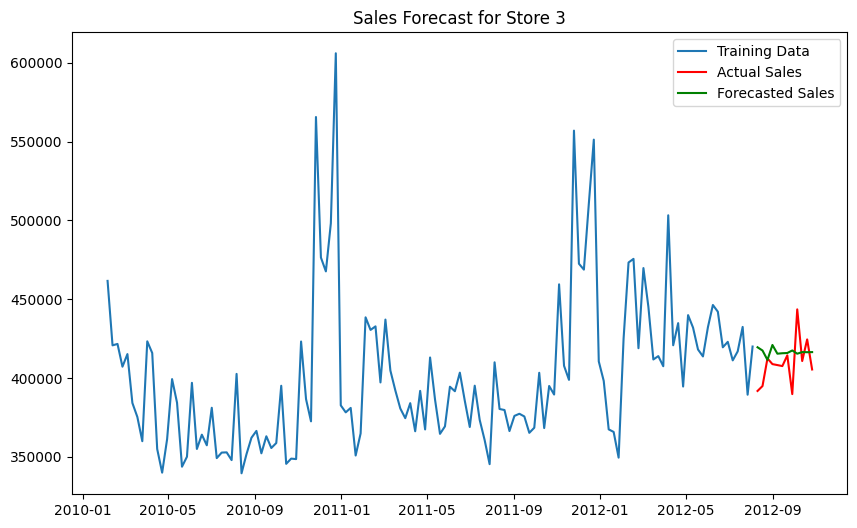

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


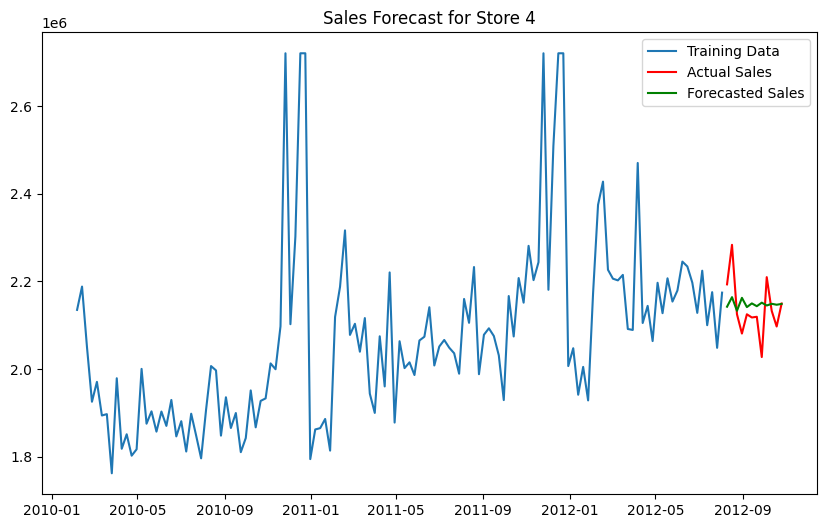

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


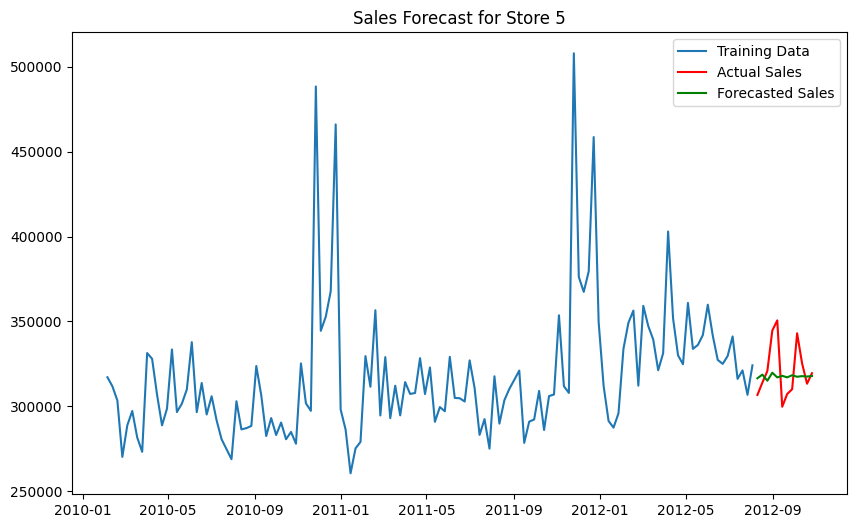

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


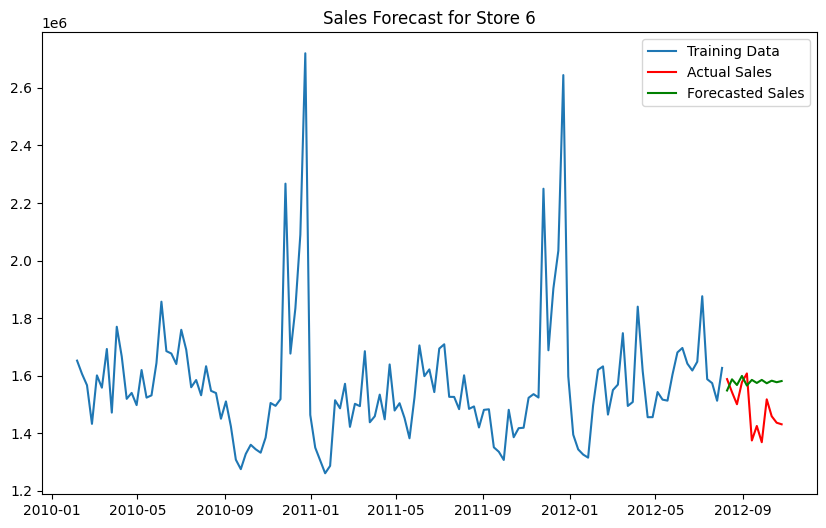

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


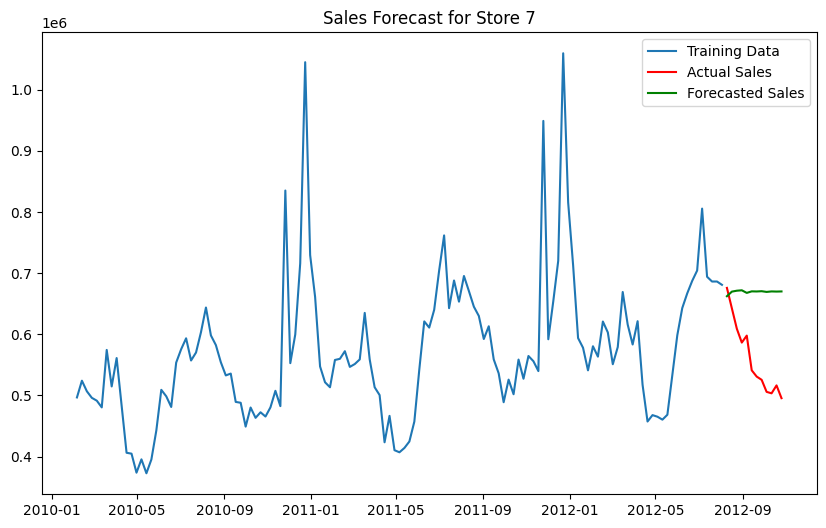

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


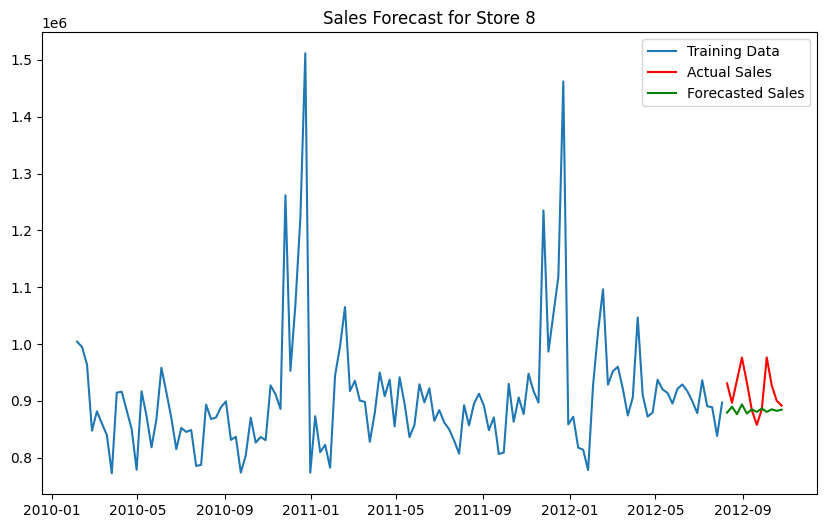

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


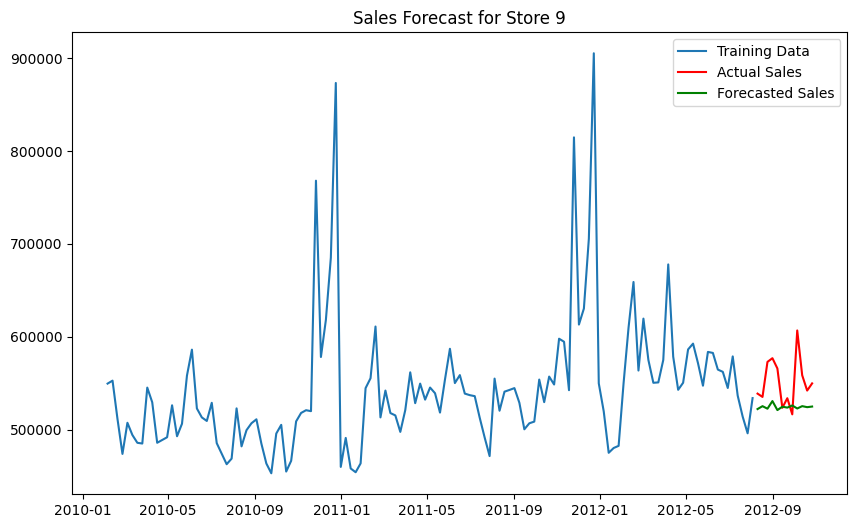

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


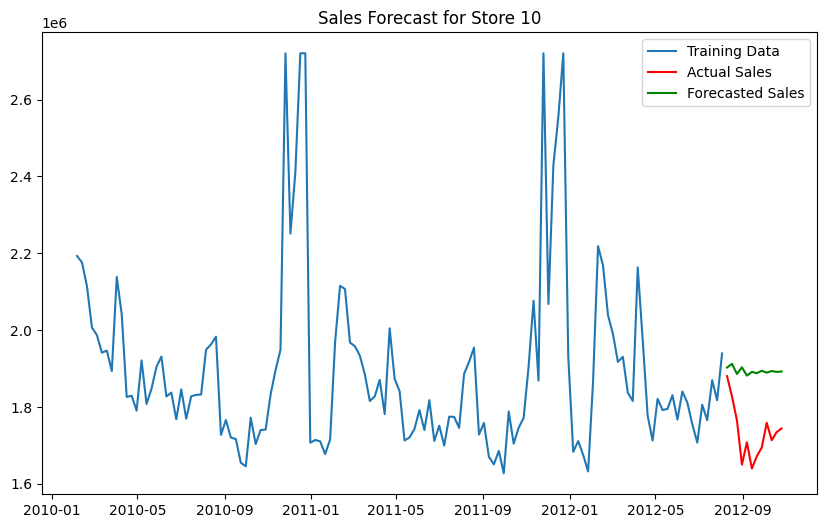

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


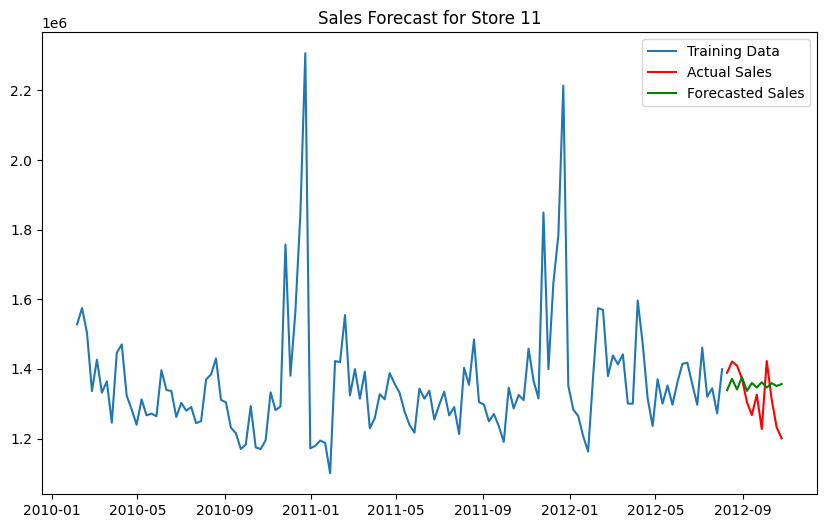

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


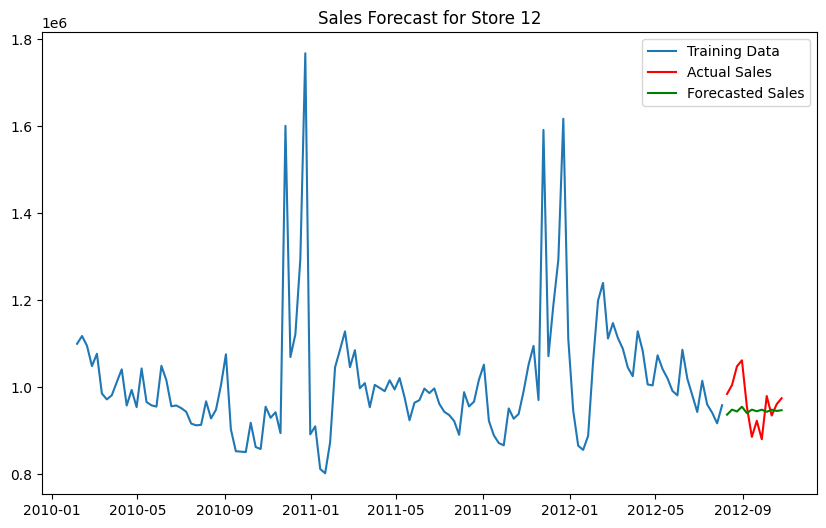

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


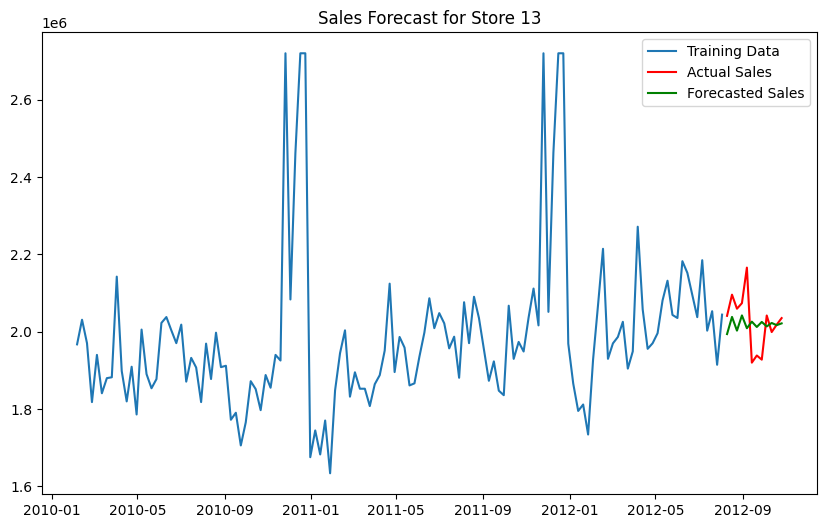

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


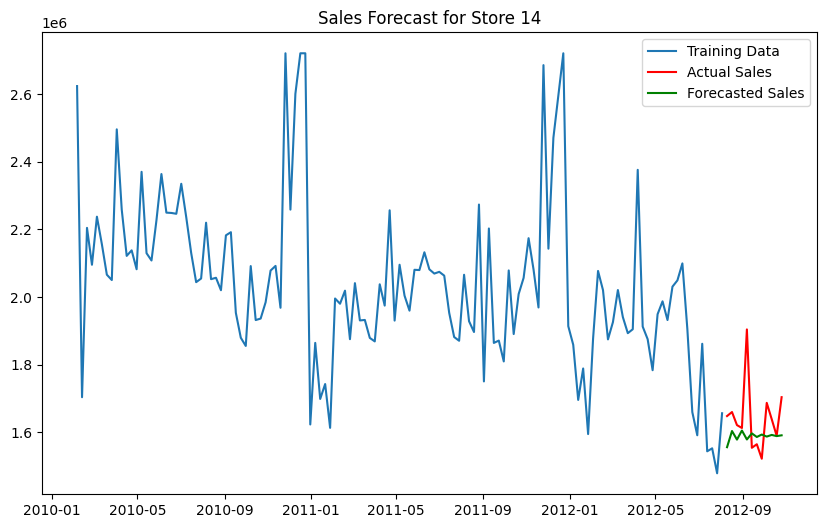

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


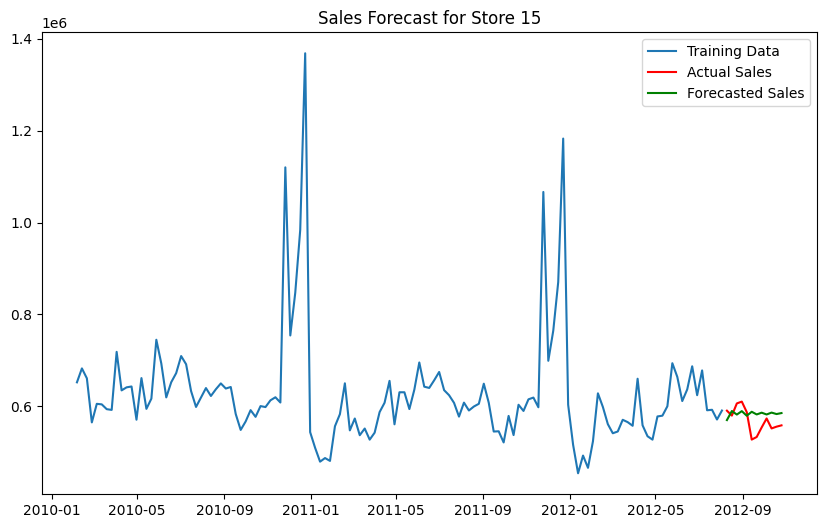

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


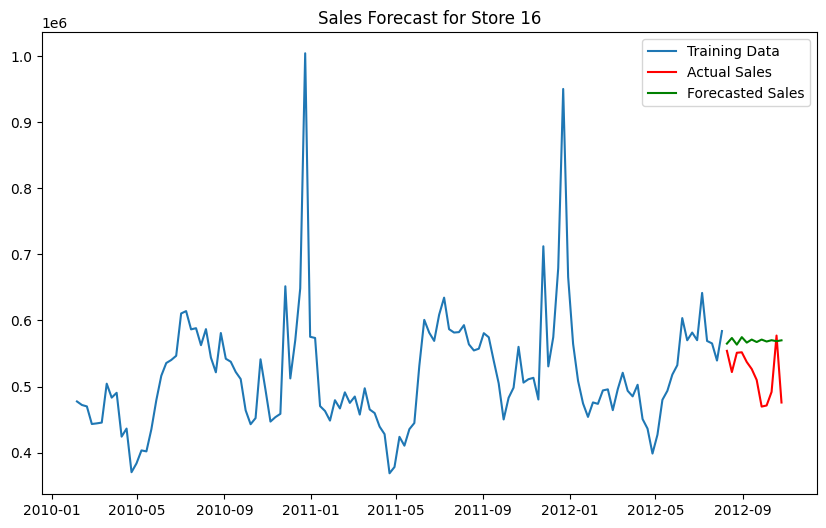

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


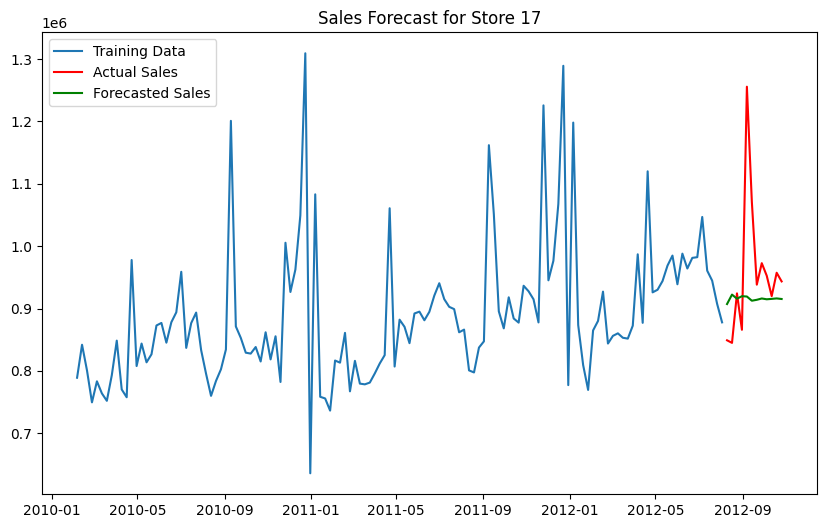

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


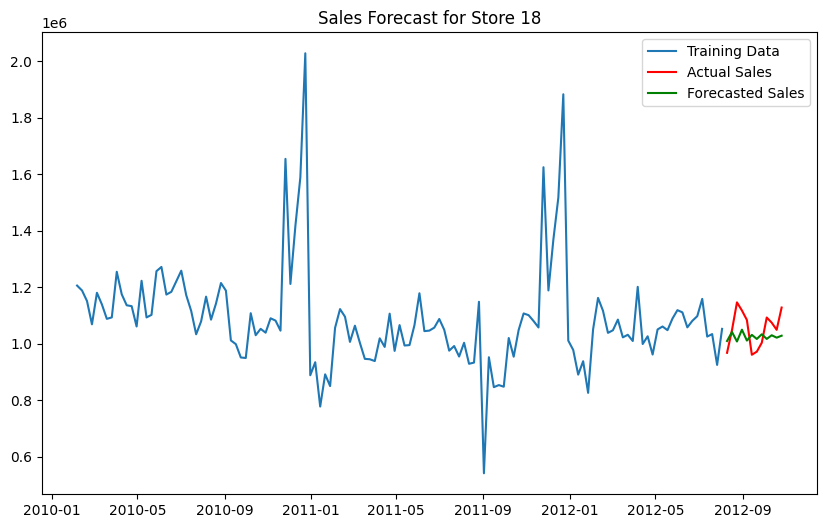

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


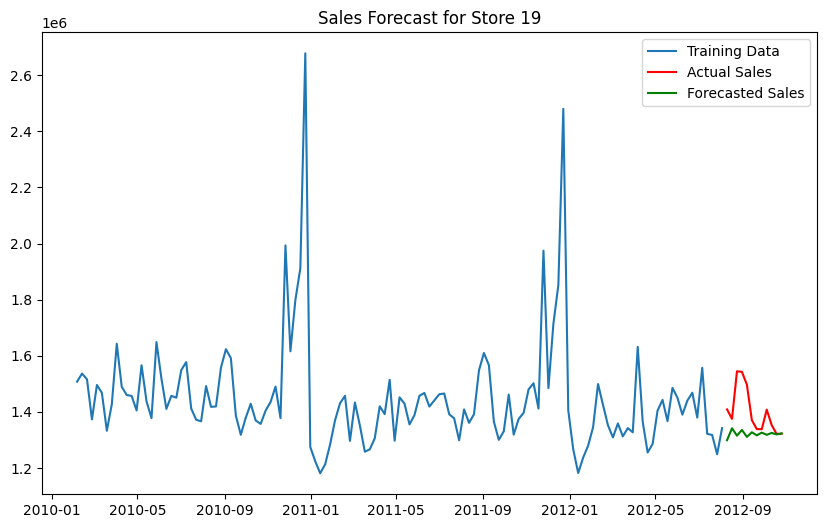

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


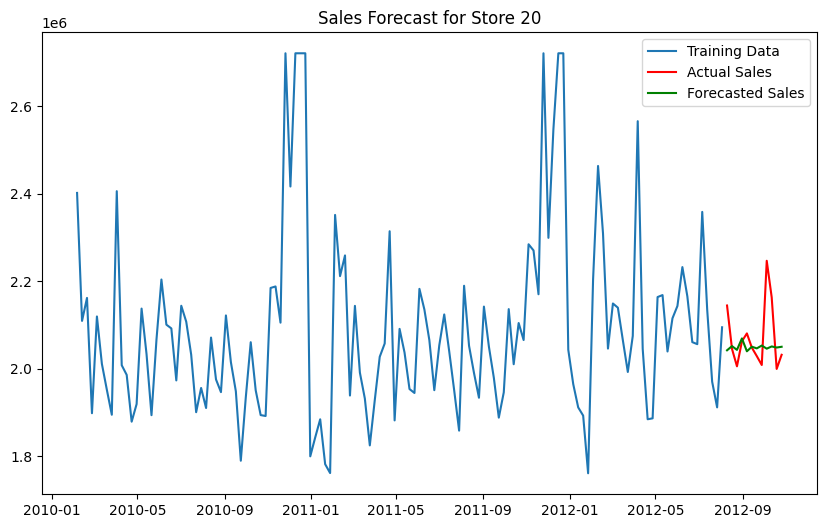

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


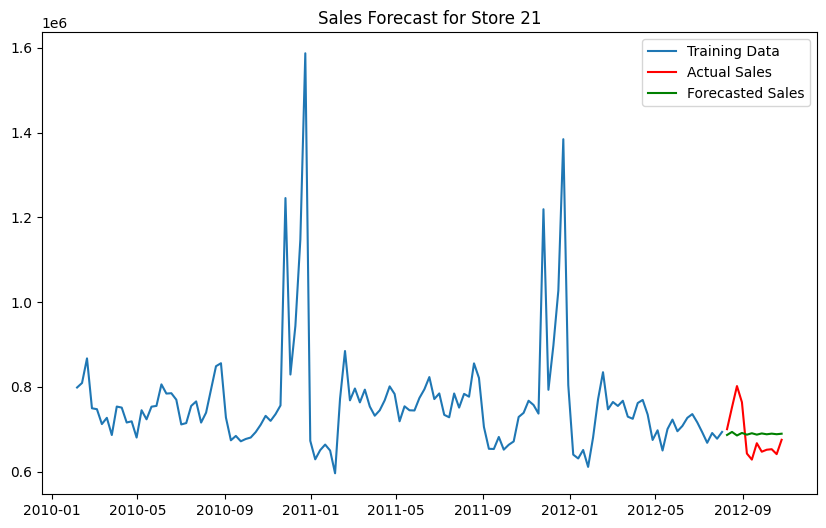

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


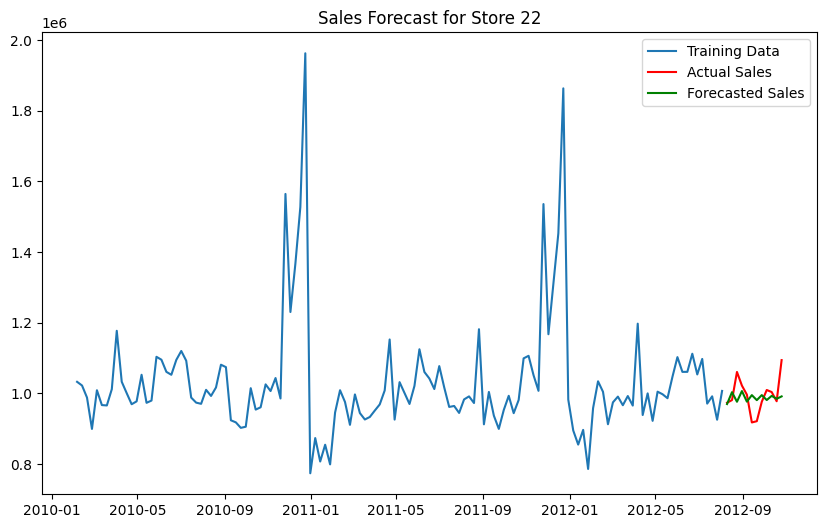

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


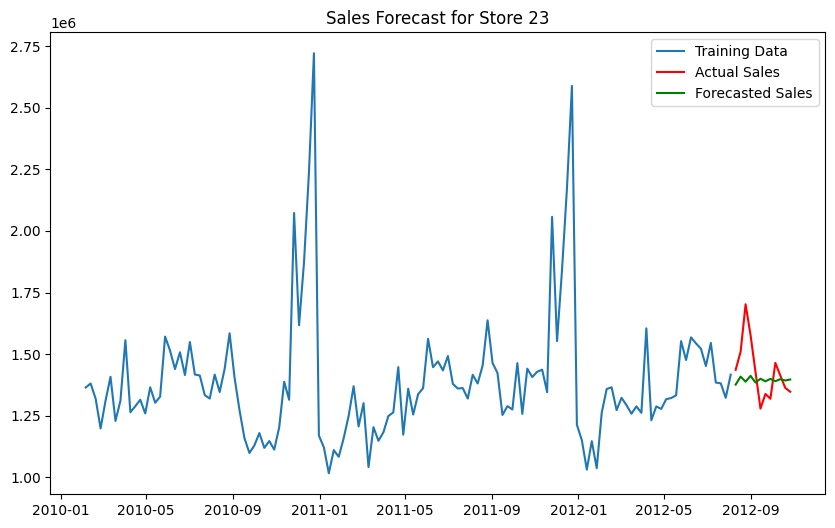

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


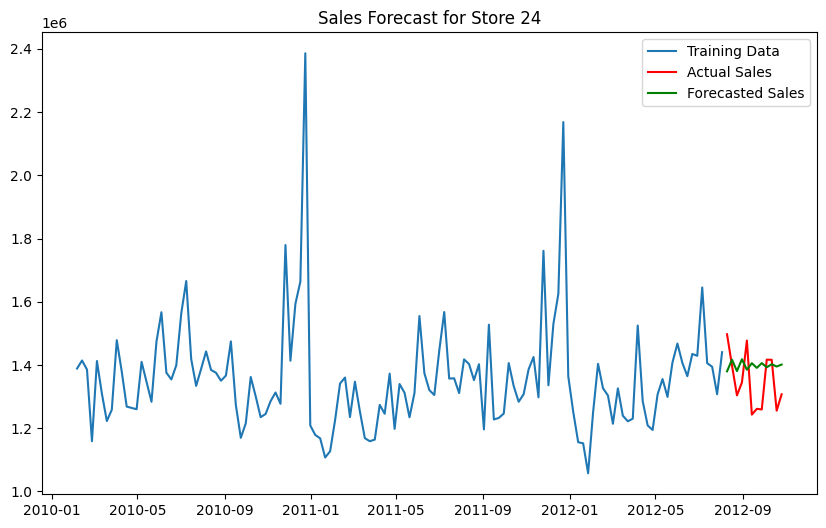

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


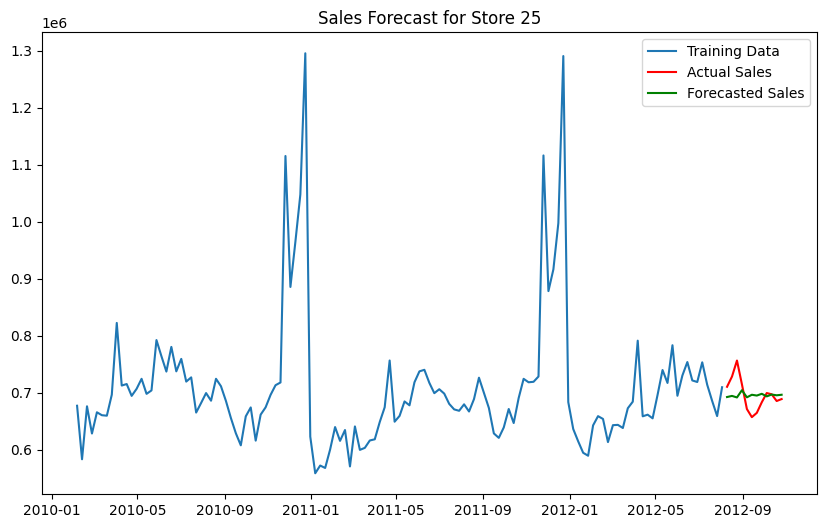

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


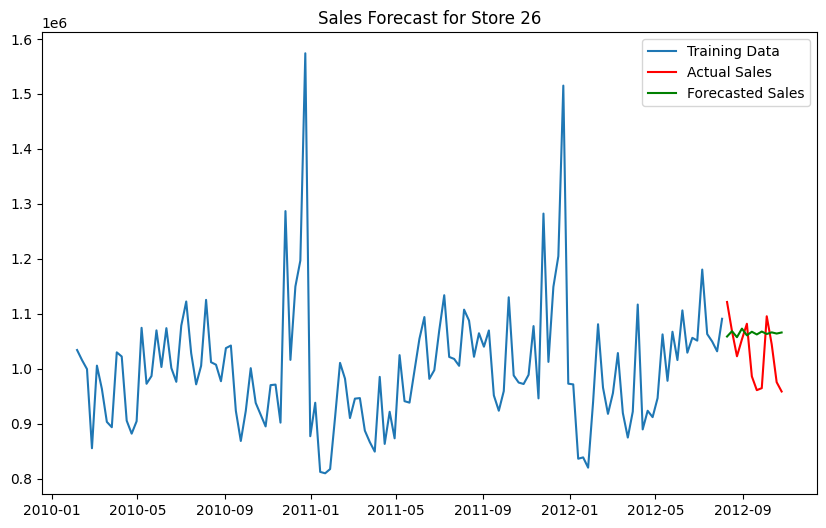

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


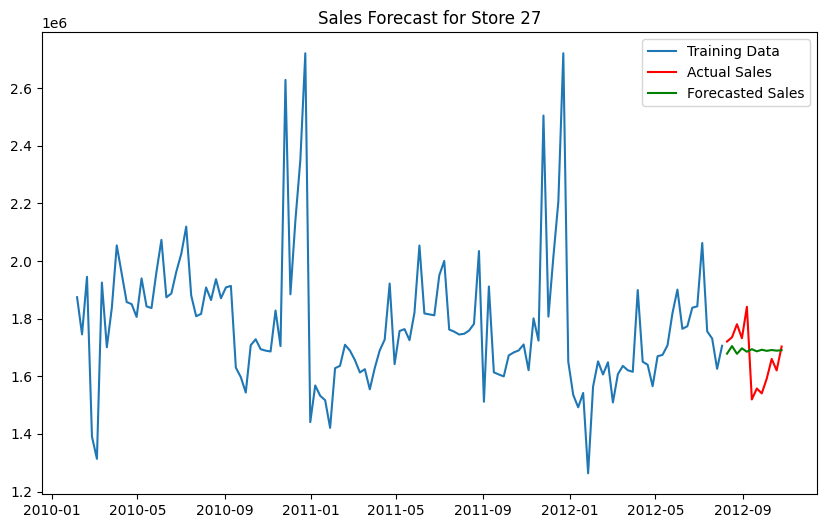

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


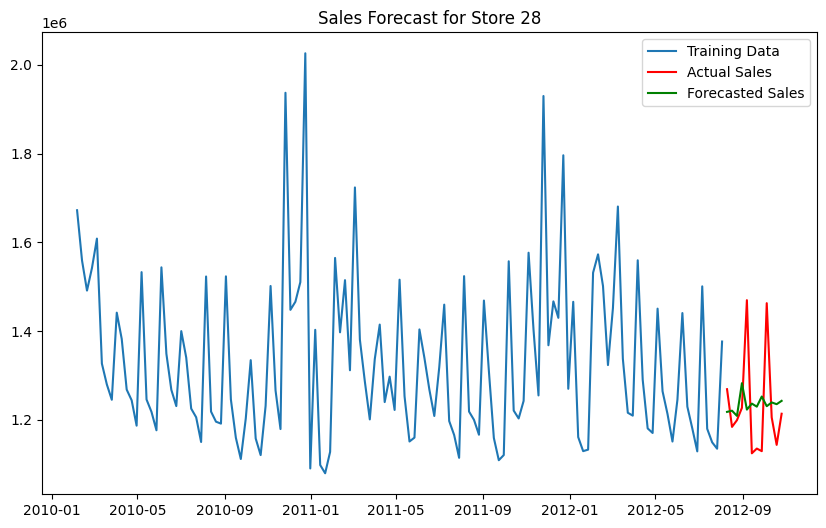

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


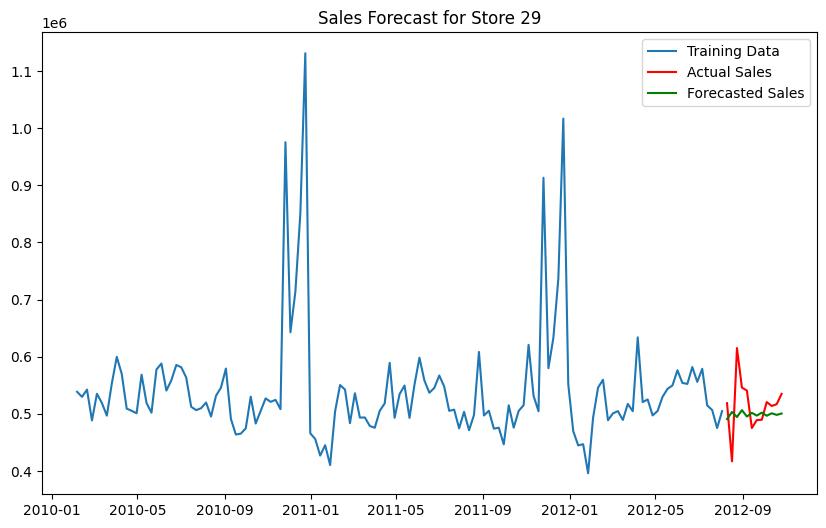

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


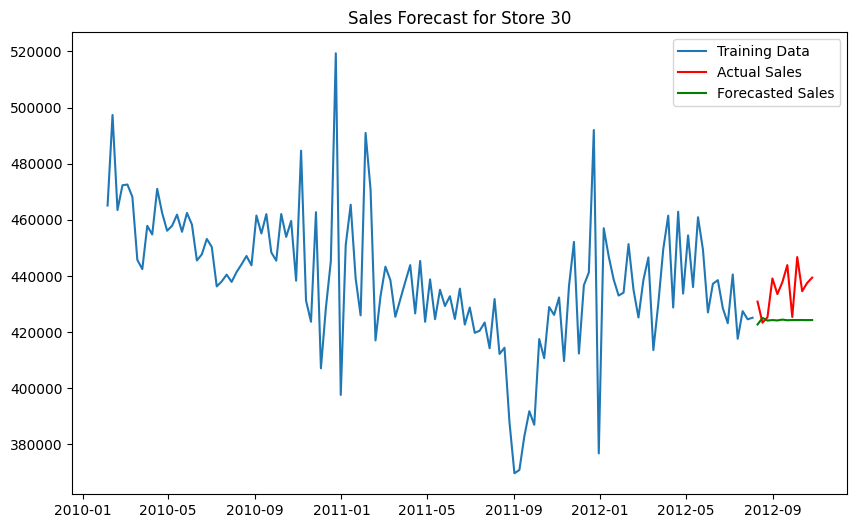

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


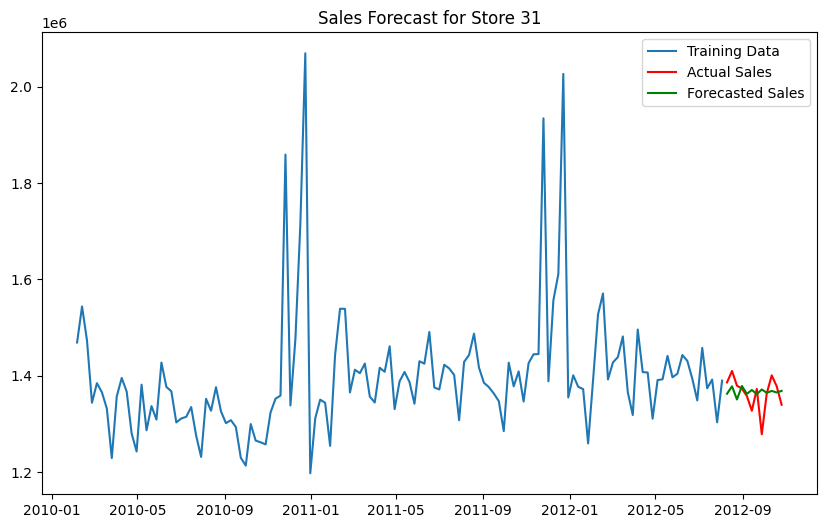

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


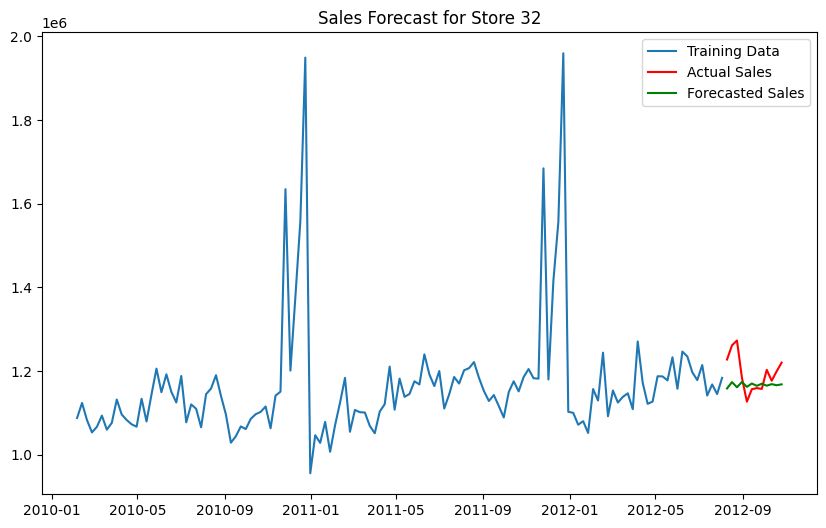

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


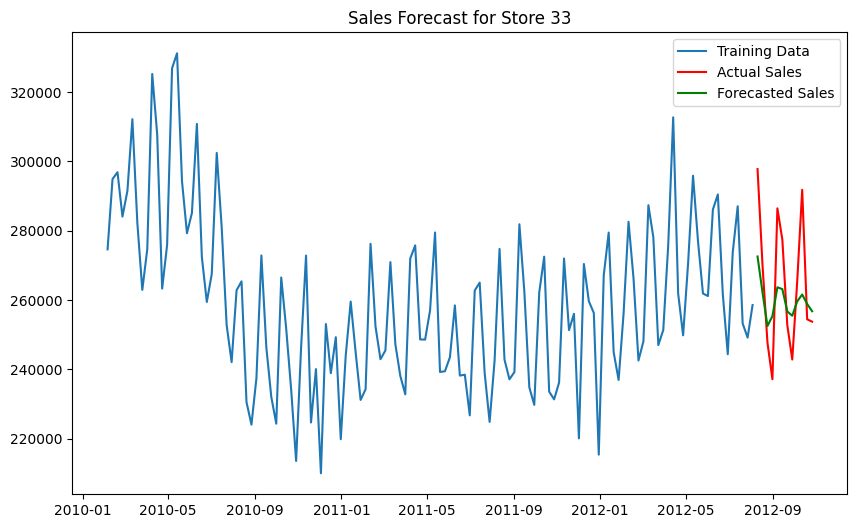

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


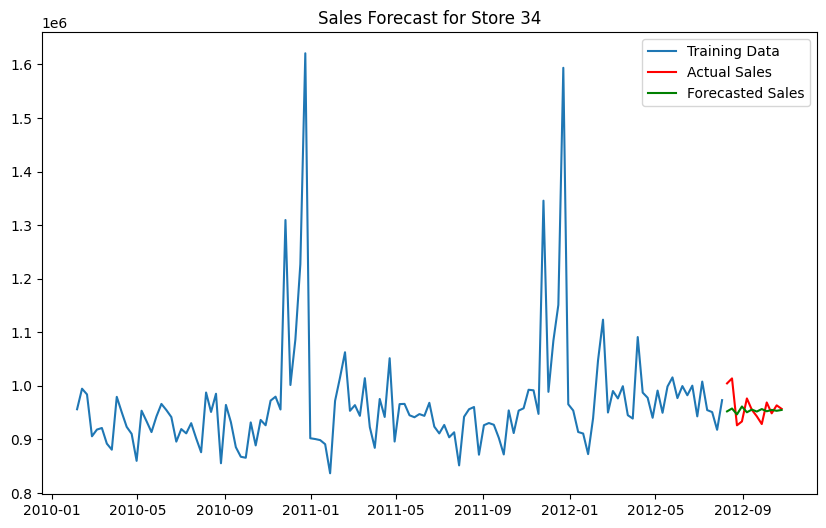

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


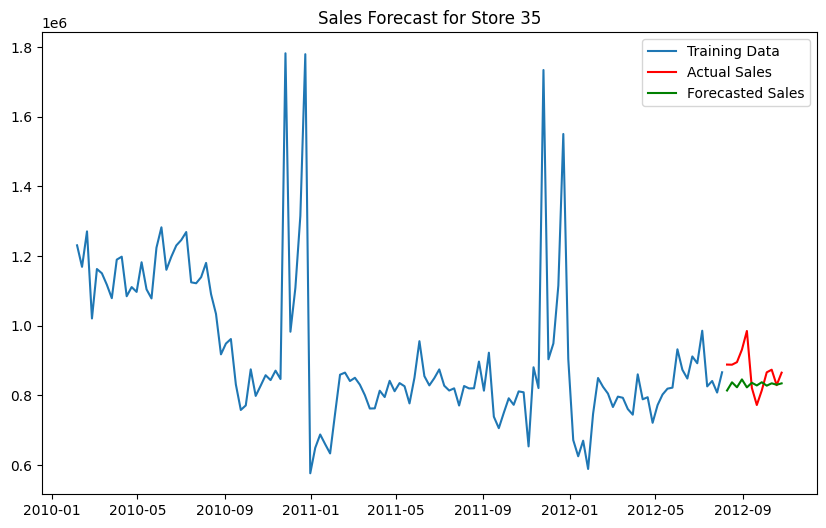

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


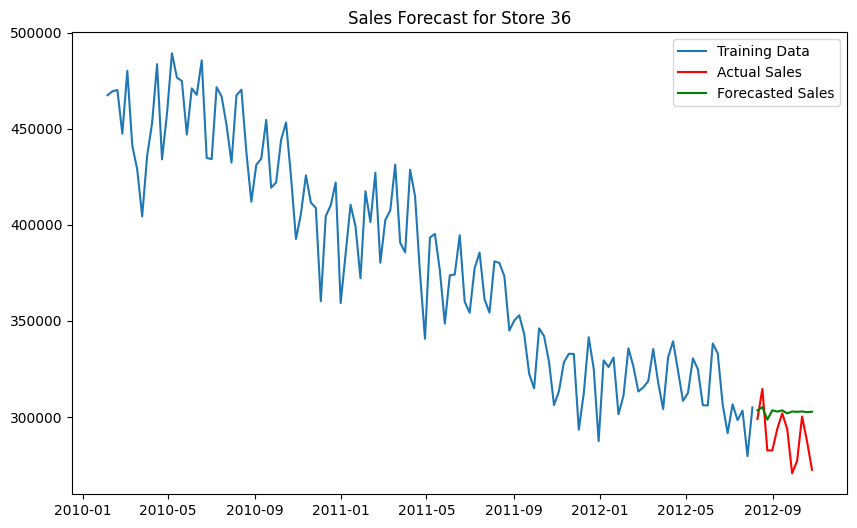

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


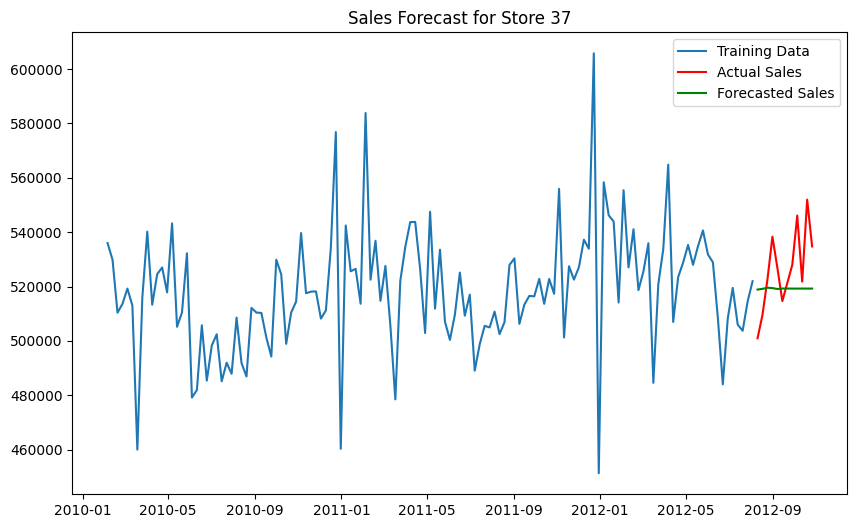

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


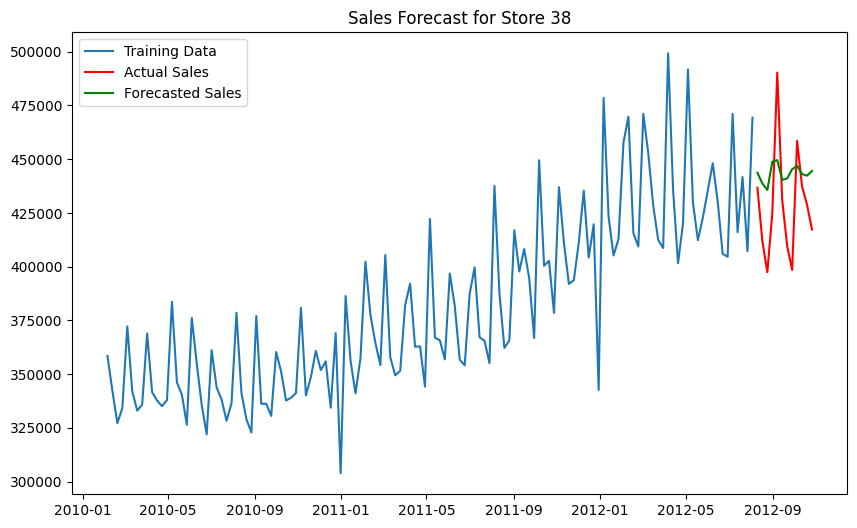

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


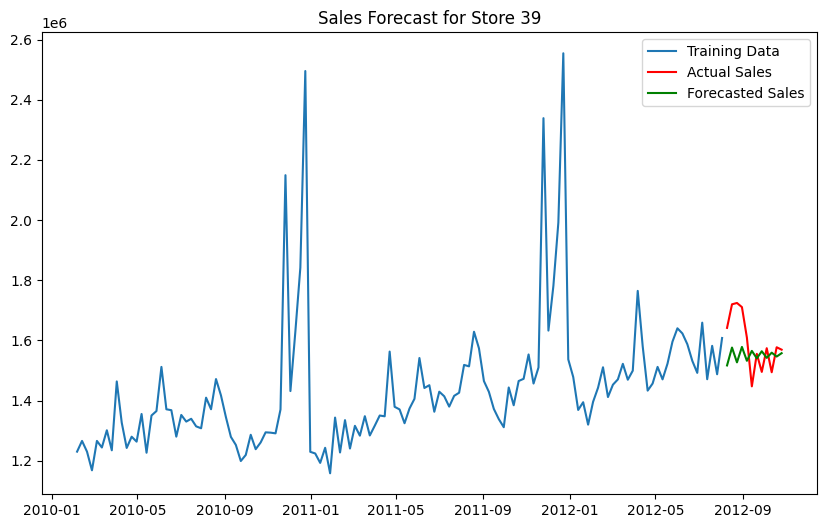

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


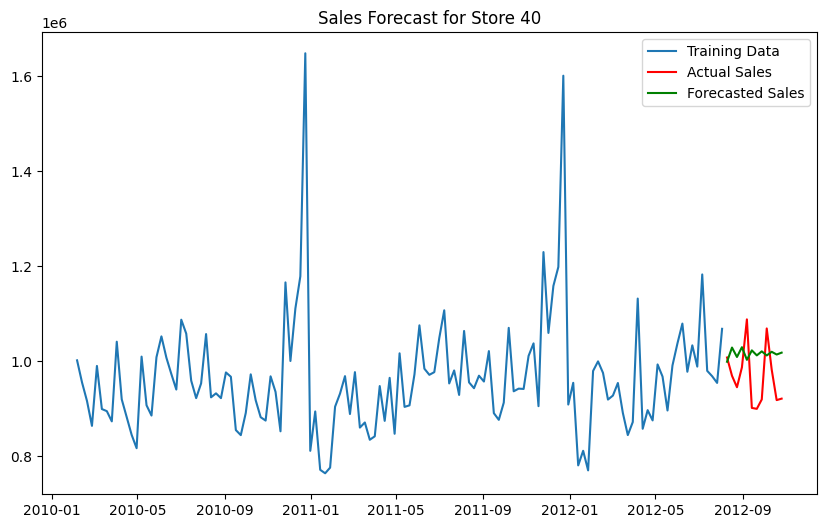

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


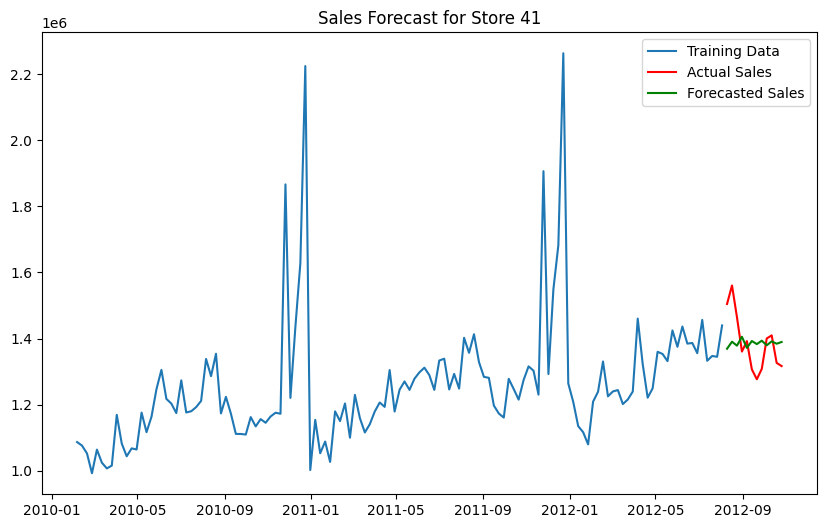

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


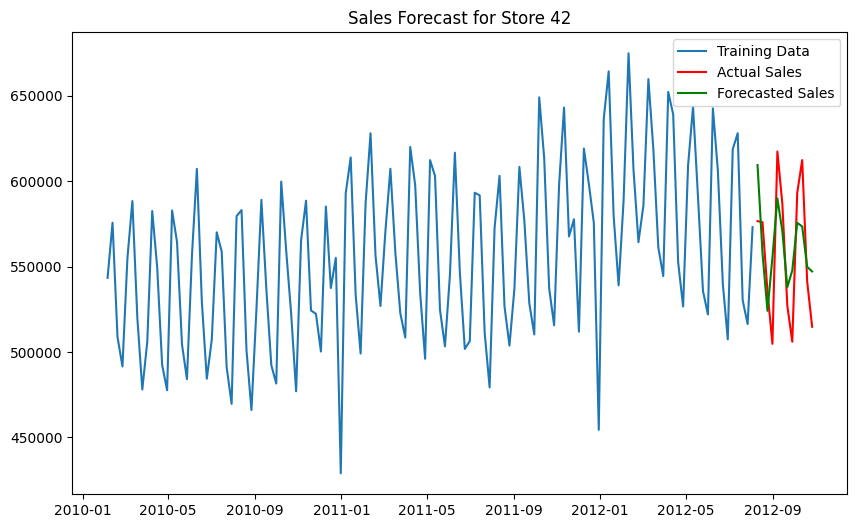

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


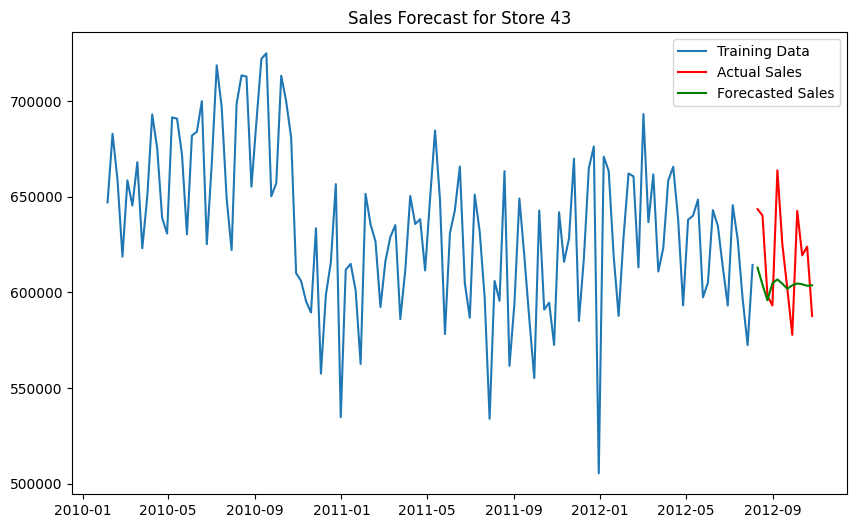

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


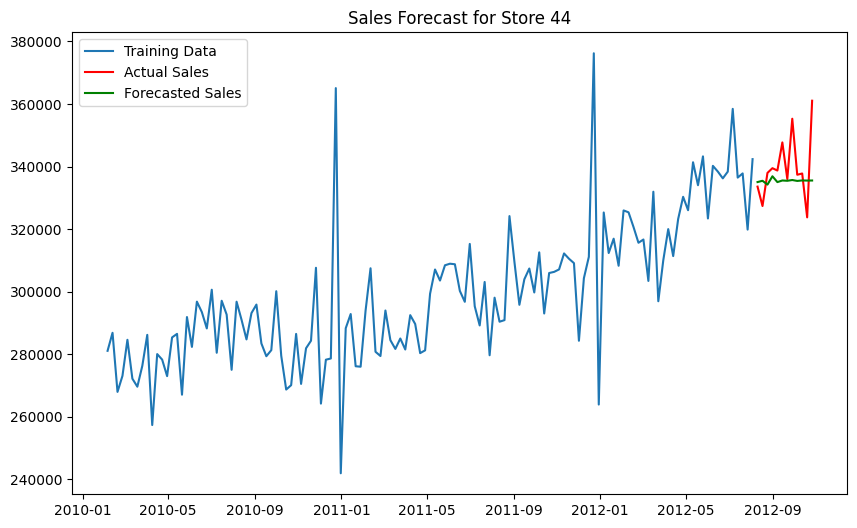

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


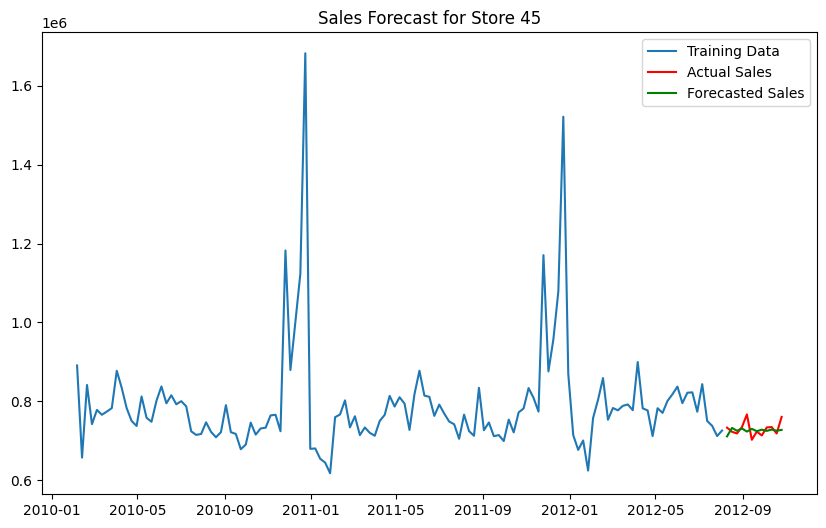

RMSE for Store 1: 72125.11
RMSE for Store 2: 65476.21
RMSE for Store 3: 16636.99
RMSE for Store 4: 63048.17
RMSE for Store 5: 16125.40
RMSE for Store 6: 124014.69
RMSE for Store 7: 123373.87
RMSE for Store 8: 48242.46
RMSE for Store 9: 36935.15
RMSE for Store 10: 173692.18
RMSE for Store 11: 83747.56
RMSE for Store 12: 57291.11
RMSE for Store 13: 71947.80
RMSE for Store 14: 112314.11
RMSE for Store 15: 30873.77
RMSE for Store 16: 60819.72
RMSE for Store 17: 114878.00
RMSE for Store 18: 69028.19
RMSE for Store 19: 113514.37
RMSE for Store 20: 77220.59
RMSE for Store 21: 54488.57
RMSE for Store 22: 49696.25
RMSE for Store 23: 120612.14
RMSE for Store 24: 103161.17
RMSE for Store 25: 27499.63
RMSE for Store 26: 67263.16
RMSE for Store 27: 101557.89
RMSE for Store 28: 118592.58
RMSE for Store 29: 49672.50
RMSE for Store 30: 12766.56
RMSE for Store 31: 35415.90
RMSE for Store 32: 51677.48
RMSE for Store 33: 15618.97
RMSE for Store 34: 27433.12
RMSE for Store 35: 67491.66
RMSE for Store 36: 

In [57]:
# Loop through each store and forecast
store_forecasts = {}
for store in data['Store'].unique():
    store_data = data[data['Store'] == store].groupby('Date')['Weekly_Sales'].sum()

    train = store_data[:-12]
    test = store_data[-12:]

    model = ARIMA(train, order=(5, 1, 0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=12)

    mse = mean_squared_error(test, forecast)
    rmse = np.sqrt(mse)

    store_forecasts[store] = {'forecast': forecast, 'rmse': rmse}

    # Plot each store's forecast
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train, label='Training Data')
    plt.plot(test.index, test, label='Actual Sales', color='red')
    plt.plot(test.index, forecast, label='Forecasted Sales', color='green')
    plt.title(f'Sales Forecast for Store {store}')
    plt.legend()
    plt.show()

# Print RMSE for each store
for store, data in store_forecasts.items():
    print(f"RMSE for Store {store}: {data['rmse']:.2f}")


In [62]:
# Create a DataFrame from the store forecasts
forecast_df = pd.DataFrame(store_forecasts).transpose()

# Export forecast results to a CSV for Power BI/Tableau
forecast_df.to_csv('store_sales_forecasts.csv')

# Assuming your original DataFrame was named 'original_data' or similar
# Replace 'original_data' with the actual name if it was different
# If you don't have the original DataFrame anymore, you'll need to reload it:
original_data = pd.read_csv("/content/Walmart DataSet.csv")  # Uncomment and load the data
original_data.to_csv('walmart_data_for_dashboard.csv', index=False)

